In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from keras.layers import LSTM, Dense
from keras.models import Sequential
from sklearn.metrics import roc_auc_score
from Vis import plot_loss, plot_roc
from Preprocessing import Preprocessing
from Preprocessing import Cols
import numpy as np
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import RobustScaler, StandardScaler
from pandas import DataFrame
from pandas import Series
import pandas as pd
from random import randint, uniform
# pandas.set_option('max_columns',10)

Using TensorFlow backend.


In [2]:
from math import sin
from math import pi
from math import exp
from random import random
from random import randint
from random import uniform
from numpy import array
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [3]:
# generate damped sine wave in [0,1]
def generate_sequence(length, period, decay):
    return [0.5 + 0.5 * sin(2 * pi * i / period) * exp(-decay * i) for i in range(length)]

In [4]:
# generate input and output pairs of damped sine waves
def generate_examples(length, n_patterns, output):
    X, y = list(), list()
    for _ in range(n_patterns):
        p = randint(10, 20)
        d = uniform(0.01, 0.1)
        sequence = generate_sequence(length + output, p, d)
        X.append(sequence[:-output])
        y.append(sequence[-output:])
    X = array(X).reshape(n_patterns, length, 1)
    y = array(y).reshape(n_patterns, output)
    return X, y

In [19]:
# configure problem
length = 10
output = 5
batch_size=10
# fit model
X, y = generate_examples(length, 50000, output)

In [20]:
# splitting train/test data 
X_train, X_test, y_train,y_test = train_test_split(X,y, train_size=.95)

In [21]:
def create_LSTM_model(max_length_seq, feature_size):
    # create the LSTM network
    model = Sequential()
    model.add(LSTM(20, return_sequences=True, input_shape=(max_length_seq, feature_size)))
    model.add(LSTM(20))
    model.add(Dense(5))
    model.compile(loss='mae', optimizer='adam')
    return model

In [22]:
# Create model
model = create_LSTM_model(length, X_train.shape[2])
history = model.fit(X_train, y_train, epochs=2, batch_size=batch_size, validation_split=0.33)

Train on 31824 samples, validate on 15676 samples
Epoch 1/2
31824/31824 [==============================] - 108s - loss: 0.0427 - val_loss: 0.0095
Epoch 2/2
31824/31824 [==============================] - 108s - loss: 0.0084 - val_loss: 0.0062


MAE: 0.006307


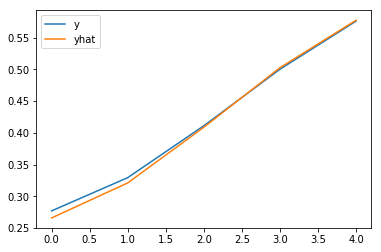

In [23]:
# evaluate model
X, y = generate_examples(length, 1000, output)
loss = model.evaluate(X, y, verbose=0)
print('MAE: %f' % loss)
# prediction on new data

yhat = model.predict(X_train, verbose=0)
pyplot.plot(y_train[0], label='y')
pyplot.plot(yhat[0], label='yhat')
pyplot.legend()
pyplot.show()